<a href="https://colab.research.google.com/github/andreas31603/MechaineLearningTasks/blob/main/Task6/Task6_Online_Retail_Clustering_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-learn yellowbrick

In [5]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [7]:
# Load dataset
file_path = '/content/drive/MyDrive/Dataset/Online Retail.xlsx'
data = pd.read_excel(file_path)

In [8]:
# Mengambil sampel acak sebanyak 2000 baris dari dataset
data_sample = data.sample(n=2000, random_state=42)

In [9]:
# Preprocessing Data
# 1. Menghapus baris dengan CustomerID yang hilang
# 2. Menghapus transaksi dengan Quantity negatif (yang kemungkinan merupakan retur)
data_clean = data_sample.dropna(subset=['CustomerID'])
data_clean = data_clean[data_clean['Quantity'] > 0]

In [10]:
# Menghitung TotalPrice untuk setiap transaksi
data_clean['TotalPrice'] = data_clean['Quantity'] * data_clean['UnitPrice']


In [11]:
# Mengelompokkan data berdasarkan CustomerID untuk mendapatkan total pengeluaran dan jumlah barang
customer_data = data_clean.groupby('CustomerID').agg({
    'TotalPrice': 'sum',   # Total pengeluaran
    'Quantity': 'sum'      # Total barang yang dibeli
}).reset_index()

In [12]:
# Standarisasi Fitur
# Menggunakan StandardScaler untuk standarisasi fitur TotalPrice dan Quantity
scaler = StandardScaler()
data_scaled = scaler.fit_transform(customer_data[['TotalPrice', 'Quantity']])

In [13]:
# KMeans Clustering dengan Metode Elbow dan Skor Silhouette
sse = {}  # Dictionary untuk menyimpan SSE (Sum of Squared Errors)
silhouette_scores = []  # List untuk menyimpan skor silhouette
k_range = range(2, 11)  # Rentang nilai k yang akan diuji

In [14]:
# Melakukan KMeans clustering untuk berbagai jumlah cluster dan menghitung SSE dan skor silhouette
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse[k] = kmeans.inertia_  # Menyimpan SSE untuk setiap k
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))  # Menyimpan skor silhouette


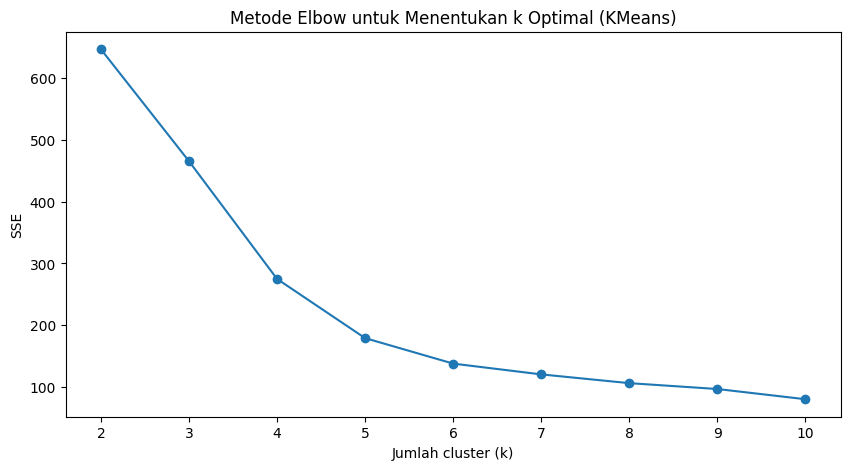

In [15]:
# Visualisasi Kurva Elbow dan Skor Silhouette untuk KMeans
plt.figure(figsize=(10, 5))
plt.plot(k_range, list(sse.values()), marker='o')
plt.title('Metode Elbow untuk Menentukan k Optimal (KMeans)')
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('SSE')
plt.show()

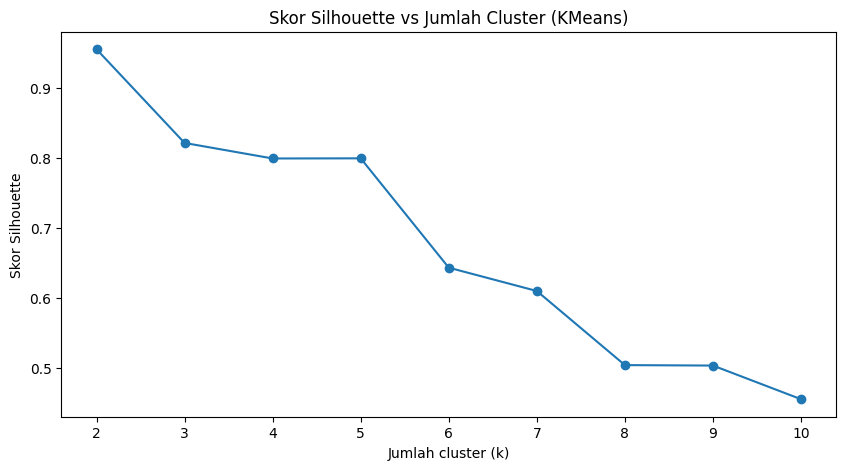

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Skor Silhouette vs Jumlah Cluster (KMeans)')
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('Skor Silhouette')
plt.show()

In [17]:
# Agglomerative Clustering dengan Skor Silhouette
agg_silhouette_scores = []  # List untuk menyimpan skor silhouette Agglomerative Clustering
for k in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    labels = agg_clustering.fit_predict(data_scaled)
    agg_silhouette_scores.append(silhouette_score(data_scaled, labels))  # Menyimpan skor silhouette

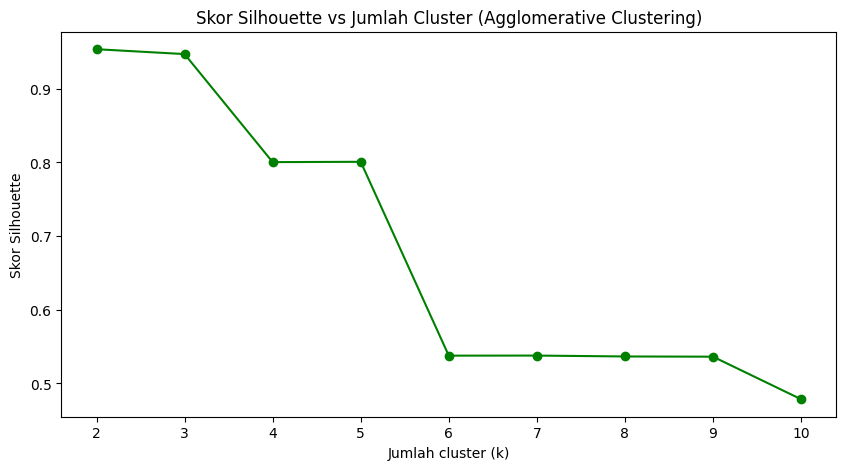

In [18]:
# Visualisasi Skor Silhouette untuk Agglomerative Clustering
plt.figure(figsize=(10, 5))
plt.plot(k_range, agg_silhouette_scores, marker='o', color='green')
plt.title('Skor Silhouette vs Jumlah Cluster (Agglomerative Clustering)')
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('Skor Silhouette')
plt.show()

In [19]:
# DBSCAN Clustering dan Skor Silhouette
# Melakukan clustering dengan DBSCAN tanpa menentukan jumlah cluster sebelumnya
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

In [20]:
# Menghitung skor silhouette untuk DBSCAN jika lebih dari satu cluster terbentuk
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette_score = silhouette_score(data_scaled, dbscan_labels)
else:
    dbscan_silhouette_score = "Tidak cukup cluster yang terbentuk"

print("Skor Silhouette DBSCAN:", dbscan_silhouette_score)
print("Jumlah cluster (tidak termasuk noise):", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))

Skor Silhouette DBSCAN: 0.9395014031403048
Jumlah cluster (tidak termasuk noise): 1


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [22]:
# Memuat dataset dan mengambil sampel 2000 data secara acak untuk mempercepat pemrosesan
file_path = '/content/drive/MyDrive/Dataset/clusteringweek06.csv'
df = pd.read_csv(file_path)
df_sample = df.sample(n=2000, random_state=42)

In [23]:
# Melakukan standarisasi data untuk mempersiapkan proses clustering
scaler = StandardScaler()
data_scaled_sample = scaler.fit_transform(df_sample)

In [25]:
# Mendefinisikan range jumlah cluster untuk metode elbow pada KMeans
k_range = range(2, 11)
kmeans_inertia_sample = []

In [26]:
# Melakukan perhitungan inertia untuk KMeans pada berbagai jumlah cluster
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_sample)
    kmeans_inertia_sample.append(kmeans.inertia_)

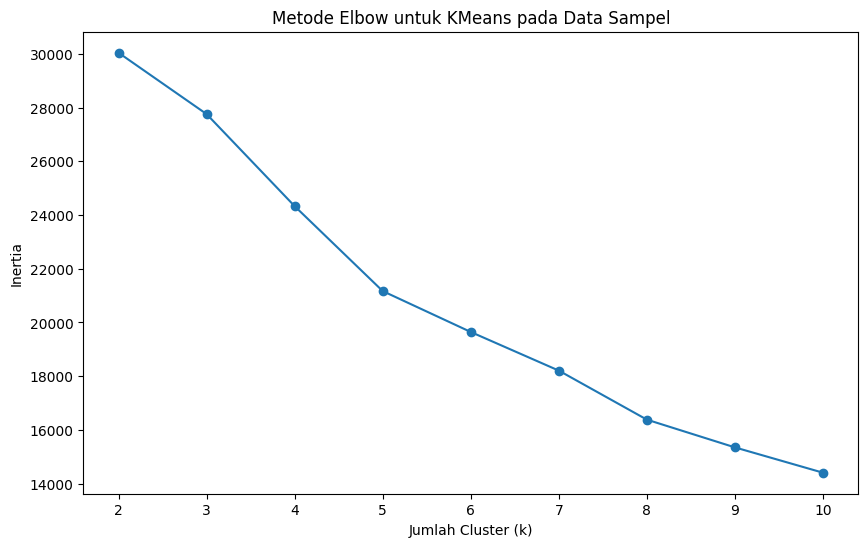

In [27]:
# Menampilkan grafik elbow untuk menentukan jumlah cluster optimal pada KMeans
plt.figure(figsize=(10, 6))
plt.plot(k_range, kmeans_inertia_sample, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Metode Elbow untuk KMeans pada Data Sampel")
plt.show()

In [28]:
# Memilih jumlah cluster optimal (dari grafik elbow), misalnya k=4
optimal_k_sample = 4


In [29]:
# Mendefinisikan model clustering dengan parameter optimal yang telah ditemukan
models = {
    "KMeans": KMeans(n_clusters=optimal_k_sample, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "AgglomerativeClustering": AgglomerativeClustering(n_clusters=optimal_k_sample)
}

In [30]:
# Fungsi untuk menghitung metrik evaluasi clustering
def evaluate_clustering(labels, data):
    silhouette_avg = silhouette_score(data, labels) if len(set(labels)) > 1 else None
    ch_score = calinski_harabasz_score(data, labels) if len(set(labels)) > 1 else None
    db_score = davies_bouldin_score(data, labels) if len(set(labels)) > 1 else None
    return {"Silhouette": silhouette_avg, "Calinski-Harabasz": ch_score, "Davies-Bouldin": db_score}

In [31]:
# Menyimpan hasil evaluasi untuk setiap model clustering
evaluation_results_sample = {}

for model_name, model in models.items():
    labels = model.fit_predict(data_scaled_sample)
    evaluation_results_sample[model_name] = evaluate_clustering(labels, data_scaled_sample)

In [36]:
# Menampilkan hasil evaluasi untuk data sampel kepada pengguna
evaluation_df_sample = pd.DataFrame(evaluation_results_sample).T
print("Sampled Clustering Model Evaluation Metrics:")
display(evaluation_df_sample)

Sampled Clustering Model Evaluation Metrics:


,Silhouette,Calinski-Harabasz,Davies-Bouldin
KMeans,0.231166,537.814207,1.481567
DBSCAN,-0.215832,4.047730,1.884020
AgglomerativeClustering,0.353062,547.269293,1.405086
